In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
train = pd.read_csv('train.csv/train.csv', parse_dates=['OrderedDate'])
test = pd.read_csv('test_additional.csv', parse_dates=['OrderedDate'])
validation = pd.read_csv('validation.csv', parse_dates=['OrderedDate'])
#test_additional = pd.read_csv('test_additional.csv', parse_dates=['OrderedDate'])

In [3]:
#train['rel'] = (train['ETA']-train['RTA'])/train['ETA']

In [4]:
train.describe()

,Id,main_id_locality,ETA,RTA,latitude,del_latitude,longitude,del_longitude,EDA,RDA,ready_latitude,ready_longitude,onway_latitude,onway_longitude,arrived_latitude,arrived_longitude,center_latitude,center_longitude
count,837128.000000,837128.000000,837128.000000,837128.000000,837128.000000,837128.000000,837128.000000,837128.000000,837128.000000,837128.000000,834220.000000,834220.000000,834220.000000,834220.000000,834220.000000,834220.000000,837128.000000,837128.000000
mean,415673.308725,14423.438796,923.829395,761.606140,55.069583,55.069632,50.585098,50.584573,5.879929,5.288495,55.069648,50.584642,55.069654,50.584643,55.069699,50.584123,55.062456,50.545537
std,239748.838834,10329.793536,551.592757,455.810121,2.249661,2.249805,3.454010,3.454653,4.562669,3.711791,2.249315,3.453416,2.249313,3.453411,2.249454,3.454041,2.261140,3.475663
min,0.000000,1078.000000,66.000000,64.000000,51.337749,51.031120,45.607342,45.598839,1.000000,1.000000,51.340227,45.600154,51.340430,45.597737,51.031205,45.599122,51.530376,45.953026
25%,208187.750000,1078.000000,524.000000,439.000000,53.206921,53.206951,49.107552,49.107830,3.000000,3.000000,53.206694,49.107750,53.206734,49.107624,53.206887,49.107858,53.183330,49.111531
50%,415507.500000,22390.000000,795.000000,653.000000,55.779968,55.781502,49.220520,49.221771,5.000000,4.000000,55.779948,49.220296,55.779974,49.220325,55.781549,49.221621,55.794388,49.111531
75%,623083.250000,22430.000000,1195.000000,964.000000,55.865045,55.866859,50.280788,50.284241,7.000000,7.000000,55.864933,50.280397,55.864926,50.280417,55.866720,50.283834,55.794388,50.116670
max,831223.000000,22438.000000,9613.000000,8370.000000,58.300060,58.334469,56.776402,56.960960,153.000000,200.000000,58.297838,56.776622,58.297935,56.776591,58.334796,56.961268,58.010321,56.234178


In [5]:
#предобработка
#train[train.rel>0.4][['ETA','RTA','EDA','RDA']]
#ind = train[(train.RTA<120)|(train.RTA>6000)|(train.rel<-0.5)|(train.rel>0.4)].index
#train.drop(ind,inplace=True)

In [6]:
train.center_longitude.nunique()

4

In [7]:
columns = ['Id','main_id_locality','ETA','OrderedDate','latitude','del_latitude','longitude','del_longitude','EDA','center_latitude','center_longitude','route']

In [8]:
#подготовим календарь праздников
holy = pd.DataFrame({'year': [2020]*12,
                   'month': [1]*6+[2]+[3]+[5]*4,
                   'day': [1, 2, 3, 6, 7, 8]+[24]+[9]+[1,4,5,11]})
holy['date'] = pd.to_datetime(holy)
holy['date'] = holy.date.dt.date
holy

,year,month,day,date
0,2020,1,1,2020-01-01
1,2020,1,2,2020-01-02
2,2020,1,3,2020-01-03
3,2020,1,6,2020-01-06
4,2020,1,7,2020-01-07
5,2020,1,8,2020-01-08
6,2020,2,24,2020-02-24
7,2020,3,9,2020-03-09
8,2020,5,1,2020-05-01
9,2020,5,4,2020-05-04


In [9]:
#выполняем предварительную кластеризацию
from sklearn.cluster import KMeans

In [10]:
%%time

#задаем модель
qty_clust = 250
#model_clust = KMeans(n_clusters=qty_clust, algorithm="full")
model_clust = KMeans(n_clusters=qty_clust, algorithm="elkan")
anal_col = ['latitude','longitude']
train_data = np.array(train[anal_col])
model_clust.fit(train_data)

CPU times: user 7min 7s, sys: 38.3 s, total: 7min 45s
Wall time: 2min 23s


KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=250, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
model_clust.cluster_centers_

array([[55.83626862, 49.10107979],
       [58.01287753, 56.23401295],
       [51.53637527, 46.0164704 ],
       [53.21230265, 50.18605167],
       [55.82710497, 49.15173966],
       [55.7791393 , 49.23228955],
       [58.02681792, 56.01041448],
       [51.49914799, 46.16959744],
       [58.05641978, 56.35296606],
       [57.97888956, 56.18655148],
       [53.23238507, 50.2759619 ],
       [55.76103578, 49.16795514],
       [58.02337774, 56.30156987],
       [53.18999691, 50.11831452],
       [55.85154658, 48.90063812],
       [51.58468625, 45.95716096],
       [55.81134958, 49.18397484],
       [55.79280582, 49.13710241],
       [51.47597297, 45.90397831],
       [58.00623026, 56.26483891],
       [53.30623355, 50.31628021],
       [55.8191946 , 49.06248414],
       [51.47985583, 46.10570762],
       [55.71396667, 49.34340576],
       [53.2152746 , 50.24500353],
       [53.50901998, 50.15564494],
       [57.99661206, 56.14551752],
       [51.57659615, 46.07228289],
       [57.99035569,

In [34]:
!pip install folium

     |████████████████████████████████| 91 kB 375 kB/s eta 0:00:01


In [46]:
import folium

fmap = folium.Map([55.83626862, 49.10107979], zoom_start=10)

for item in model_clust.cluster_centers_:
    lat = item[0]
    long = item[1]
    import random

    folium.Marker(
        location=[lat, long],
        icon=folium.Icon(color='black'),
    ).add_to(fmap)

fmap.save('cluster_centers.html')

fmap

In [11]:
import polyline
import hashlib

def clusts_for_route(route): #немножко не прибрано, как успели
    try:
        r = str(np.unique(model_clust.predict(pd.DataFrame(polyline.decode(route)).to_numpy())))
    except:
        r = ''
                       
    return int(hashlib.sha256(r.encode('utf-8')).hexdigest(), 16) % 10**8

In [12]:
clusts_for_route(train.loc[117738]['route'])

65823056

In [13]:
def feats(df):
    df = df[columns].copy()
    df['dayofweek'] = df['OrderedDate'].dt.dayofweek
    #df['minute'] = df['OrderedDate'].dt.minute
    #df['minute'] = df['minute'].apply(lambda x: 0.5 if x>30  else 0)
    df['hour'] = df['OrderedDate'].dt.hour#+df['minute']
    #df['weekend'] = df['dayofweek'].apply(lambda x: 1 if x in [5,6] else 0)
    
    df['route_clust'] = df['route'].apply(clusts_for_route)
    
    del df['route']
    
    #праздники убираем
    #df['date'] = df.OrderedDate.dt.date
    #df['holy'] = df.apply(lambda x: 1 if (x.date in list(holy.date))|(x.dayofweek in [5,6]) else 0,axis=1)
    #del df['date']
    
    clust_data = np.array(df[anal_col])
    df['clust'] = model_clust.predict(clust_data)
    clust_data = np.array(df[['del_latitude','del_longitude']])
    df['del_clust'] = model_clust.predict(clust_data)
    
    df['new_clust'] = df['clust']*300+df['del_clust']
    #df['distance_to_citycenter'] = df.apply(
    #    lambda row: dist_calc(row.latitude, row.longitude, row.center_latitude, row.center_longitude), axis=1)
    #df['del_distance_to_citycenter'] = df.apply(
    #    lambda row: dist_calc(row.del_latitude, row.del_longitude, row.center_latitude, row.center_longitude), axis=1)
    #df['distance_to_kremlin'] = df.apply(
        #lambda row: dist_calc(row.center_latitude, row.center_longitude, kremlin_lat, kremlin_lon), axis=1)
    
    #df['norm']=df.apply(lambda row: 10000*np.linalg.norm([row['latitude']-row['del_latitude'],row['longitude']-row['del_longitude']])/row['EDA'], axis=1)
    #df['norm']=df.apply(lambda row: 100*np.linalg.norm([row['latitude']-row['del_latitude'],row['longitude']-row['del_longitude']]), axis=1)
    
    #del df['dayofweek']
    del df['OrderedDate']
    #del df['minute']
    
    del df['latitude']
    del df['del_latitude']
    del df['longitude']
    del df['del_longitude']
    del df['center_latitude']
    del df['center_longitude']
    
    #del df['EDA']
    
    return df

feats(test).head()

,Id,main_id_locality,ETA,EDA,dayofweek,hour,route_clust,clust,del_clust,new_clust
0,0,1078,1212,13,5,0,35354096,213,119,64019
1,1,1078,968,8,5,0,91128122,62,16,18616
2,2,1078,492,3,5,0,45465573,59,93,17793
3,3,1078,953,9,5,0,27786126,59,202,17902
4,4,1078,1746,16,5,0,12927132,202,219,60819


In [14]:
%%time

X_tr = feats(train)
X_va = feats(validation)
X_te = feats(test)

y_tr = train.RTA
y_va = validation.RTA

CPU times: user 1h 1min 19s, sys: 58.2 s, total: 1h 2min 17s
Wall time: 15min 36s


In [15]:
# маленький финт ушами для улучшения скора на лидерборде
X_tr = X_tr.append(X_va)
y_tr = y_tr.append(y_va)

In [16]:
cat_cols = ['main_id_locality','dayofweek','hour','clust','del_clust','new_clust']

In [17]:
import lightgbm as lgb
import gc

tr_data = lgb.Dataset(X_tr, label=y_tr, categorical_feature=cat_cols)
va_data = lgb.Dataset(X_va, label=y_va, categorical_feature=cat_cols, reference=tr_data)

gc.collect()

# Train the model
parameters = {
    'task': 'train',
    'boosting_type': 'dart',
    'objective': 'regression',
    'metric': 'mean_absolute_percentage_error',
    'num_leaves':200
}


model = lgb.train(parameters,
                  tr_data,
                  valid_sets=va_data,
                  num_boost_round=170,
                  early_stopping_rounds=100,
                  verbose_eval=5)

#[170]	valid_0's mape: 0.13439

/home/oleg/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:1243: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/home/oleg/anaconda3/lib/python3.7/site-packages/lightgbm/callback.py:192: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[5]	valid_0's mape: 0.385205
[10]	valid_0's mape: 0.298144
[15]	valid_0's mape: 0.242479
[20]	valid_0's mape: 0.198294
[25]	valid_0's mape: 0.182106
[30]	valid_0's mape: 0.172207
[35]	valid_0's mape: 0.169459
[40]	valid_0's mape: 0.16858
[45]	valid_0's mape: 0.166872
[50]	valid_0's mape: 0.141529
[55]	valid_0's mape: 0.141098
[60]	valid_0's mape: 0.155882
[65]	valid_0's mape: 0.188134
[70]	valid_0's mape: 0.152091
[75]	valid_0's mape: 0.139478
[80]	valid_0's mape: 0.137992
[85]	valid_0's mape: 0.13991
[90]	valid_0's mape: 0.141549
[95]	valid_0's mape: 0.148338
[100]	valid_0's mape: 0.139197
[105]	valid_0's mape: 0.165573
[110]	valid_0's mape: 0.159495
[115]	valid_0's mape: 0.137758
[120]	valid_0's mape: 0.13715
[125]	valid_0's mape: 0.137564
[130]	valid_0's mape: 0.137779
[135]	valid_0's mape: 0.135599
[140]	valid_0's mape: 0.138441
[145]	valid_0's mape: 0.136519
[150]	valid_0's mape: 0.136054
[155]	valid_0's mape: 0.139146
[160]	valid_0's mape: 0.144917
[165]	valid_0's mape: 0.135746


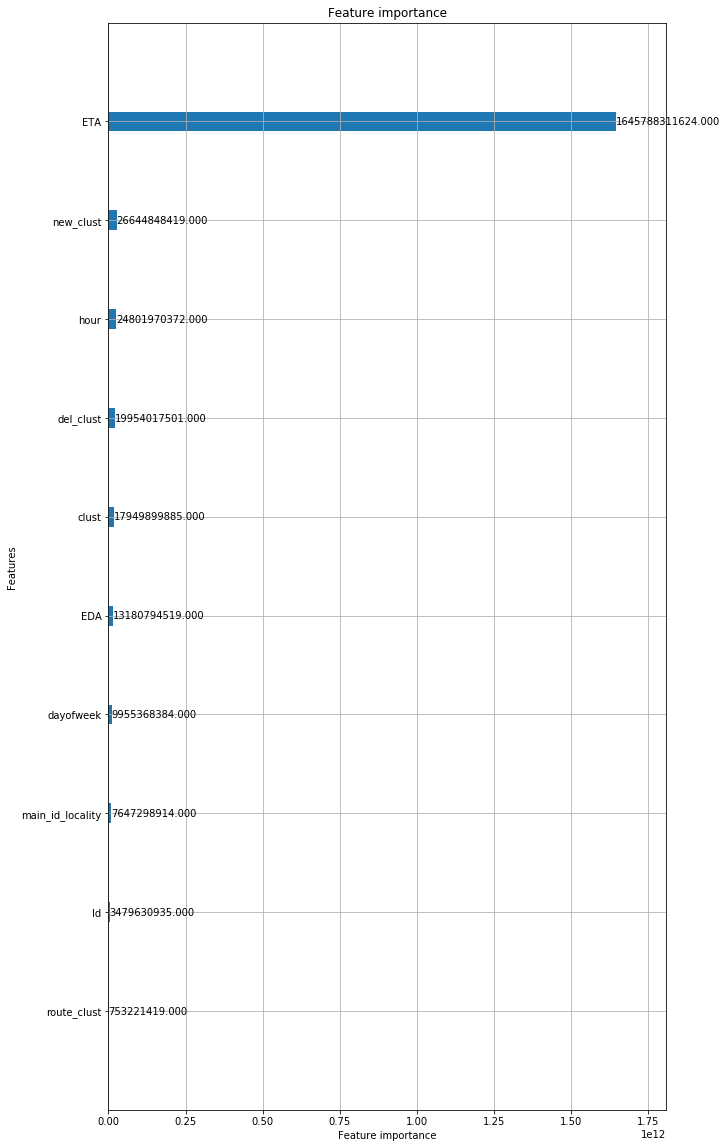

In [18]:
%matplotlib inline
lgb.plot_importance(model, importance_type='gain', figsize=(10,20));

In [22]:
%%time

y_te = model.predict(X_te)
y_te

CPU times: user 4.21 s, sys: 3.84 ms, total: 4.21 s
Wall time: 547 ms


array([ 849.22077827,  639.24021541,  367.24774212, ..., 1218.41436744,
        273.12613781, 1501.13361852])

In [29]:
%%time
model.predict(X_te.head(10000))

CPU times: user 667 ms, sys: 4.07 ms, total: 671 ms
Wall time: 102 ms


array([ 849.22077827,  639.24021541,  367.24774212, ...,  736.73395239,
        499.5523679 , 1923.23174539])

In [20]:
X_te['Id'] = X_te.index
X_te['Prediction'] = model.predict(X_te)

In [21]:
X_te[['Id','Prediction']].to_csv('submit.csv', index=False)